#Assignment 1: LSTM-based Stock Trading System
#Vansh Kapoor (200100164)
#Assignment Done Induvidually

In [ ]:
from google.colab import drive
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import copy
import torch.nn as nn
import matplotlib.dates as mdates
from tqdm.notebook import tqdm
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [ ]:
dir_path='/content/drive/MyDrive/EE782_Assg_1'
files_list=os.listdir(dir_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Q1) Familiarizing with the input data



##1 (a) Plot the minute-by-minute closing price series of few stocks

In [ ]:
file_path1='/content/drive/MyDrive/EE782_Assg_1/ATO_1min.txt'#File path
file_path2='/content/drive/MyDrive/EE782_Assg_1/DXC_1min.txt'
file_path3='/content/drive/MyDrive/EE782_Assg_1/CAG_1min.txt'
file_path4='/content/drive/MyDrive/EE782_Assg_1/CMCSA_1min.txt'
file_path5='/content/drive/MyDrive/EE782_Assg_1/AWK_1min.txt'
df=[]
col_names=['Time', 'Open','Max', 'Min', 'Close', 'Vol'] #Names given to the columns
stocks=['ATO','DXC','CAG','CMCSA','AWK'] #Names of the stock
df.append(pd.read_csv(file_path1,names=col_names))
df.append(pd.read_csv(file_path2,names=col_names))
df.append(pd.read_csv(file_path3,names=col_names))
df.append(pd.read_csv(file_path4,names=col_names))
df.append(pd.read_csv(file_path5,names=col_names)) #Appending the stock data
for i in range(len(df)):
    df[i].iloc[:,0]=pd.to_datetime(df[i].iloc[:,0]) #Converting Date column to Datetime type

<ipython-input-150-3a221cad45b7>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df[i].iloc[:,0]=pd.to_datetime(df[i].iloc[:,0]) #Converting Date column to Datetime type
<ipython-input-150-3a221cad45b7>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df[i].iloc[:,0]=pd.to_datetime(df[i].iloc[:,0]) #Converting Date column to Datetime type
<ipython-input-150-3a221cad45b7>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old be

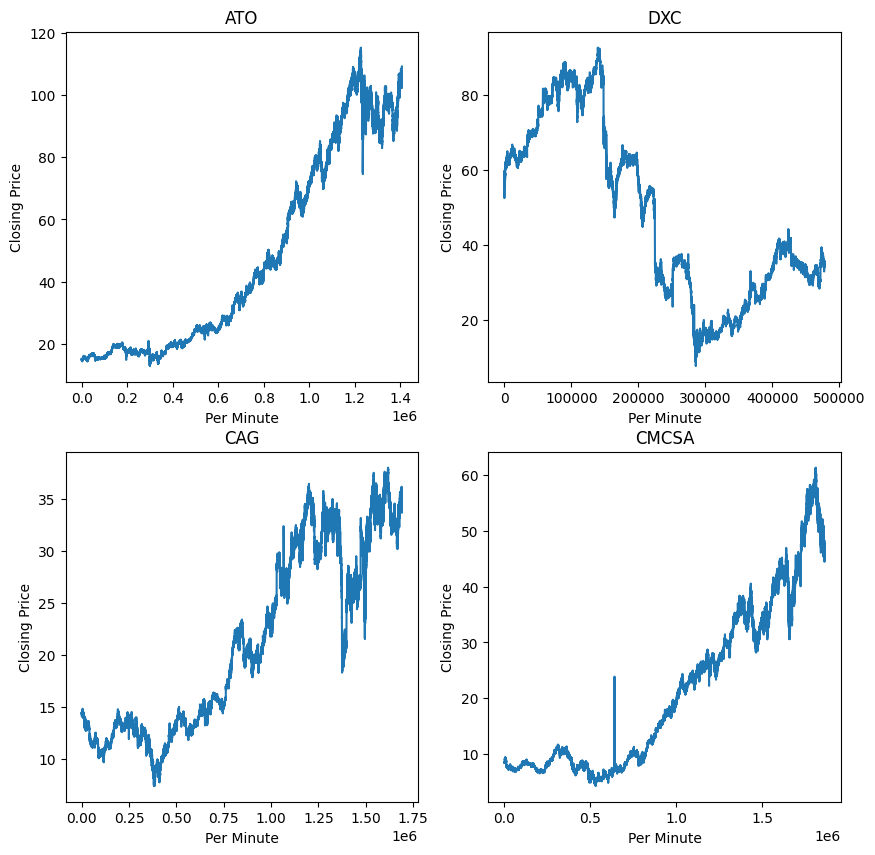

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) #creating multiple subplots
k=0
for i in range(0,2):
    for j in range(0,2):
        lst=df[k].Close
        axes[i,j].plot(np.arange(len(df[k])),lst)
        axes[i,j].set_xlabel('Per Minute')
        axes[i,j].set_ylabel('Closing Price')
        axes[i,j].set_title(stocks[k])
        k+=1
plt.show()

##1(b) Plot the day-by-day closing price series of a few stocks

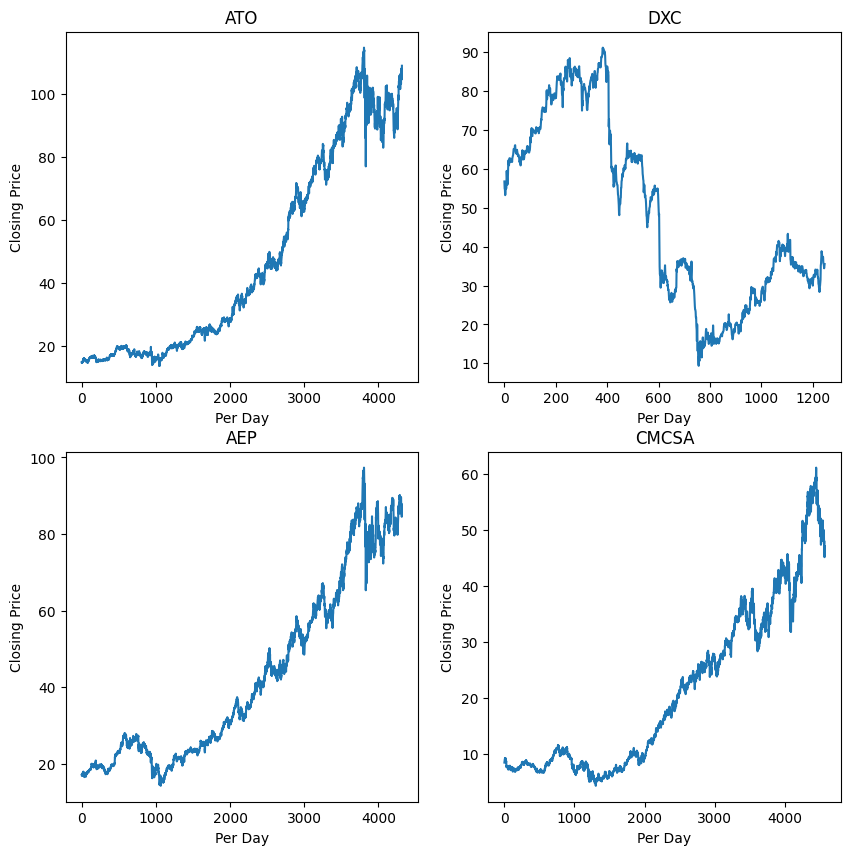

In [ ]:
days_lst=[]
for j in range(5):
    lst=[]
    for i in range(len(df[j])):
        date=df[j].iloc[i,0].strip().split(' ')[0] #spliting Time entries based on Day
        day= date.split('-')[-1]
        if(i==0):
            var= day
        if(day!=var):
            lst.append(i-1)
            var=day
    lst.append(len(df[j])-1)
    days_lst.append(lst) #day list contains the indices of distinct dates
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) #creating multiple subplots
k=0
for i in range(0,2):
    for j in range(0,2):
        lst=df[k].iloc[days_lst[k]].Close
        axes[i,j].plot(np.arange(len(df[k].iloc[days_lst[k]])),lst)
        axes[i,j].set_xlabel('Per Day')
        axes[i,j].set_ylabel('Closing Price')
        axes[i,j].set_title(stocks[k])
        k+=1
plt.show()

##1(c) Plot a complete candlestick chart with volume on secondary y-axis for a few stocks with atime period of your choice

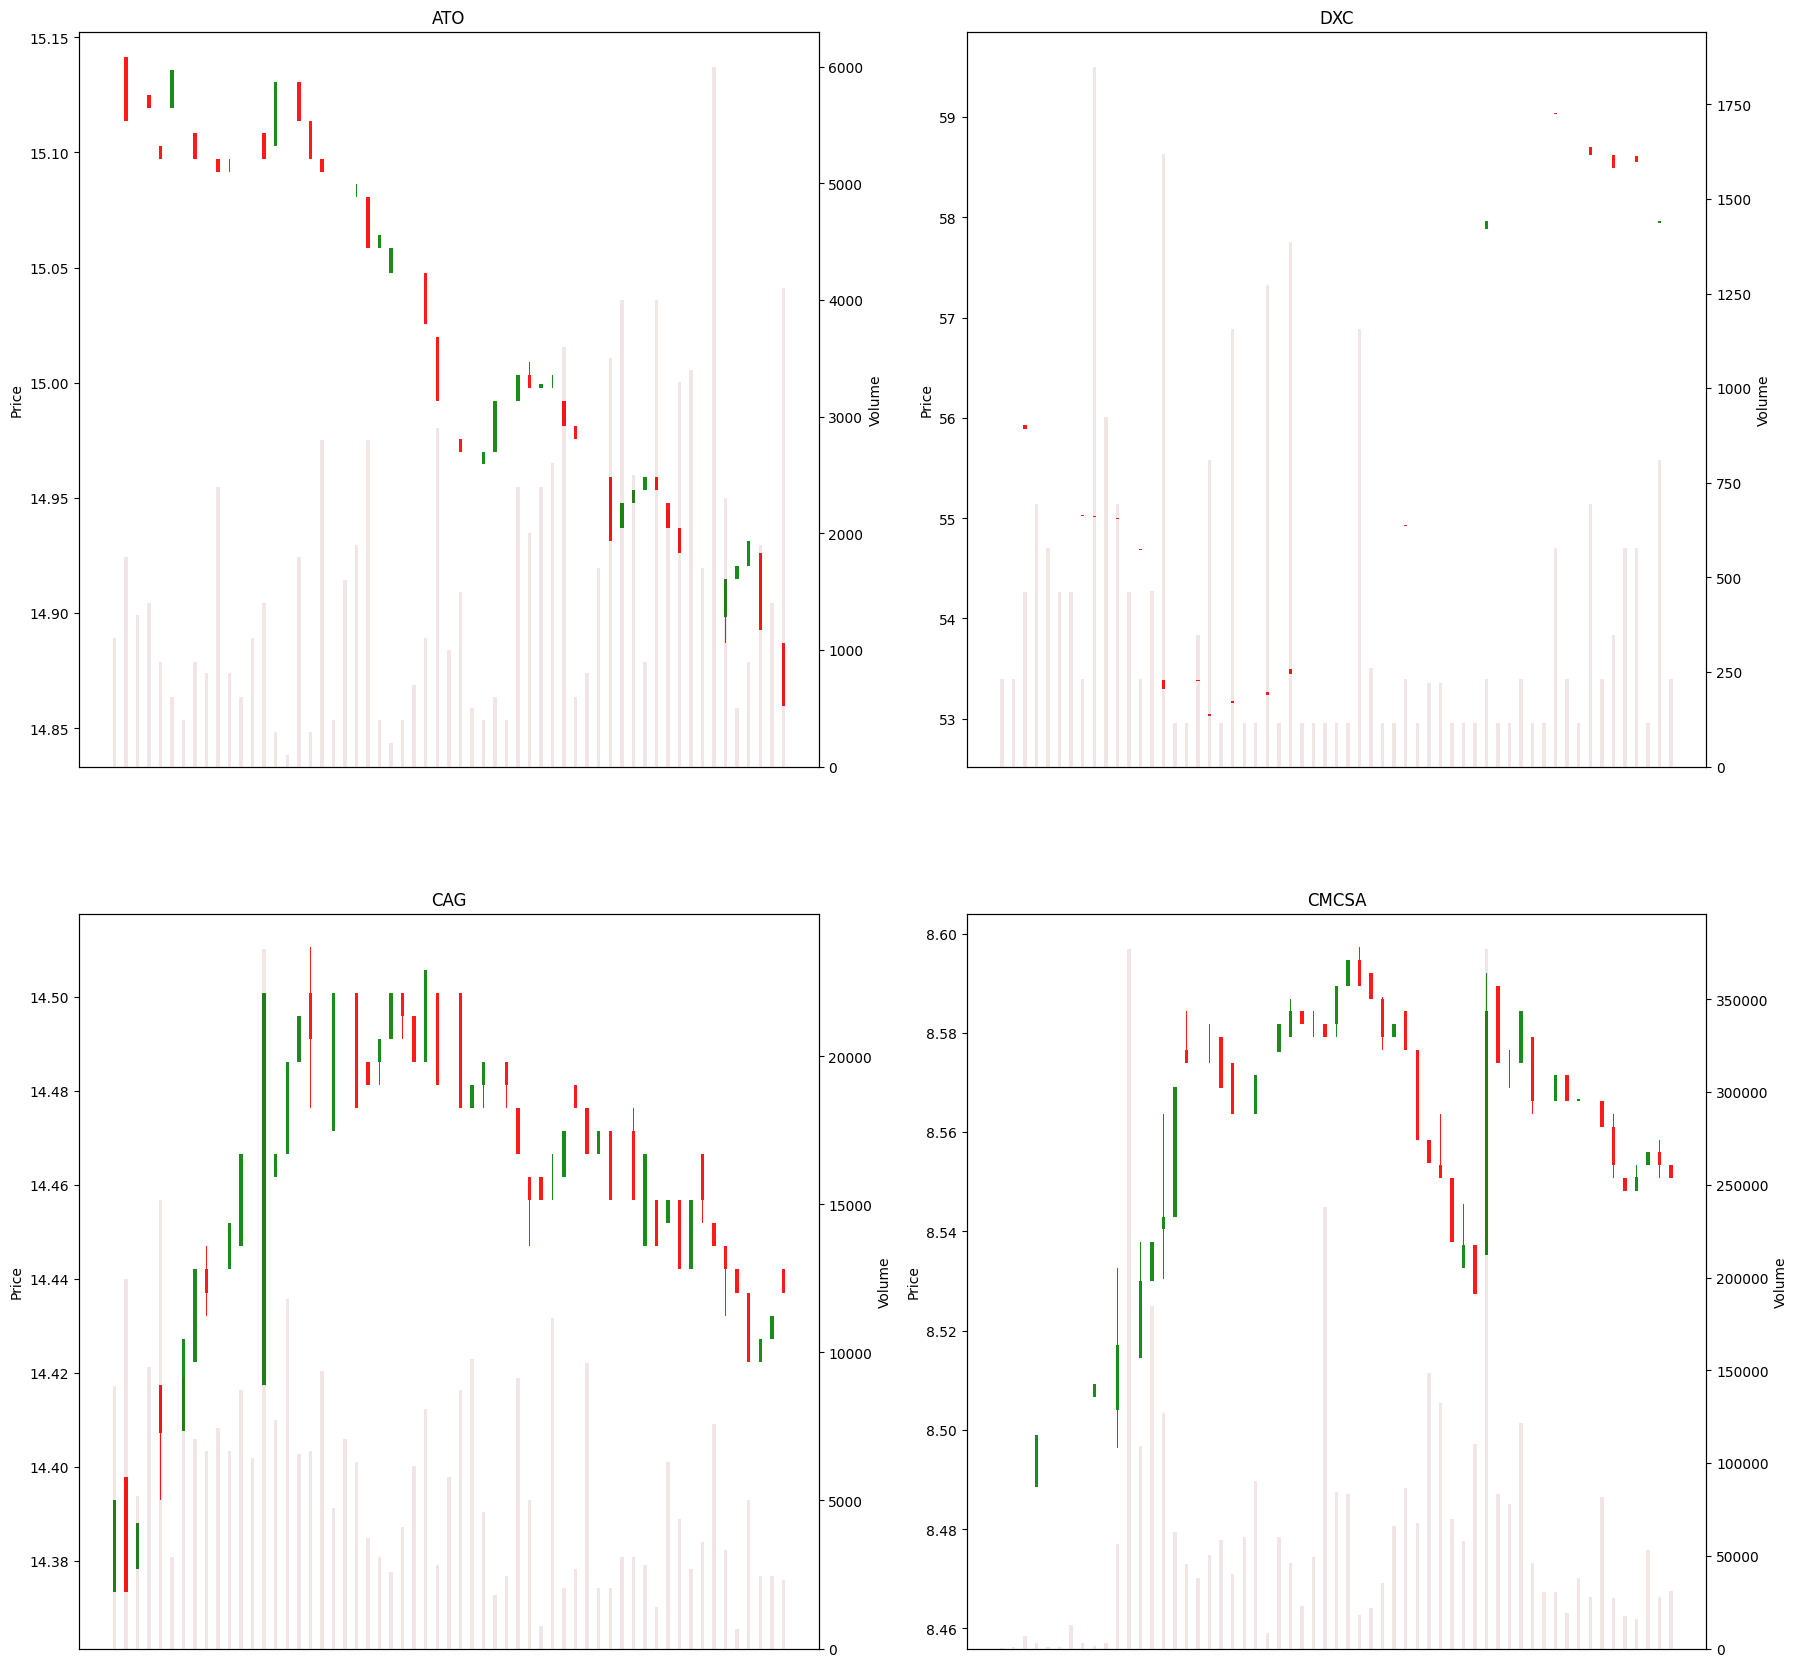

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 21))
k=0
for i in range(0,2):
    for j in range(0,2):
        up=df[k].iloc[1:60][df[k].iloc[1:60].Open<=df[k].iloc[1:60].Close] #defining up as the entries where Closing is greater than Opening
        down=df[k].iloc[1:60][df[k].iloc[1:60].Close<df[k].iloc[1:60].Open] #defining up as the entries where Closing is less than Opening
        c1='green'
        c2='red'
        w=0.03
        w1=0.3
        axes[i,j].bar(up.index, up.Close-up.Open, w1, bottom=up.Open, color=c1,alpha=0.9)
        axes[i,j].bar(up.index, up.Max-up.Close, w, bottom=up.Close, color=c1,alpha=0.9)
        axes[i,j].bar(up.index, up.Min-up.Open,w, bottom=up.Open,color=c1,alpha=0.9)
        axes[i,j].bar(down.index, down.Close-down.Open, w1, bottom=down.Open, color=c2,alpha=0.9)
        axes[i,j].bar(down.index, down.Max-down.Open, w, bottom=down.Open, color=c2,alpha=0.9)
        axes[i,j].bar(down.index, down.Min-down.Close,w, bottom=down.Close,color=c2,alpha=0.9)
        axes[i,j].set_title(stocks[k])
        # axes[i,j].set_xticklabels(down.Time,rotation=30, ha='right')
        axes[i,j].set_ylabel('Price')
        ax2 = axes[i,j].twinx()
        ax2.bar(df[k].iloc[1:60].index, df[k].iloc[1:60].Vol, color ='maroon',width = 0.3,alpha=0.1)
        ax2.set_ylabel('Volume')
        ax2.set_xticks([])

        k+=1
plt.show()

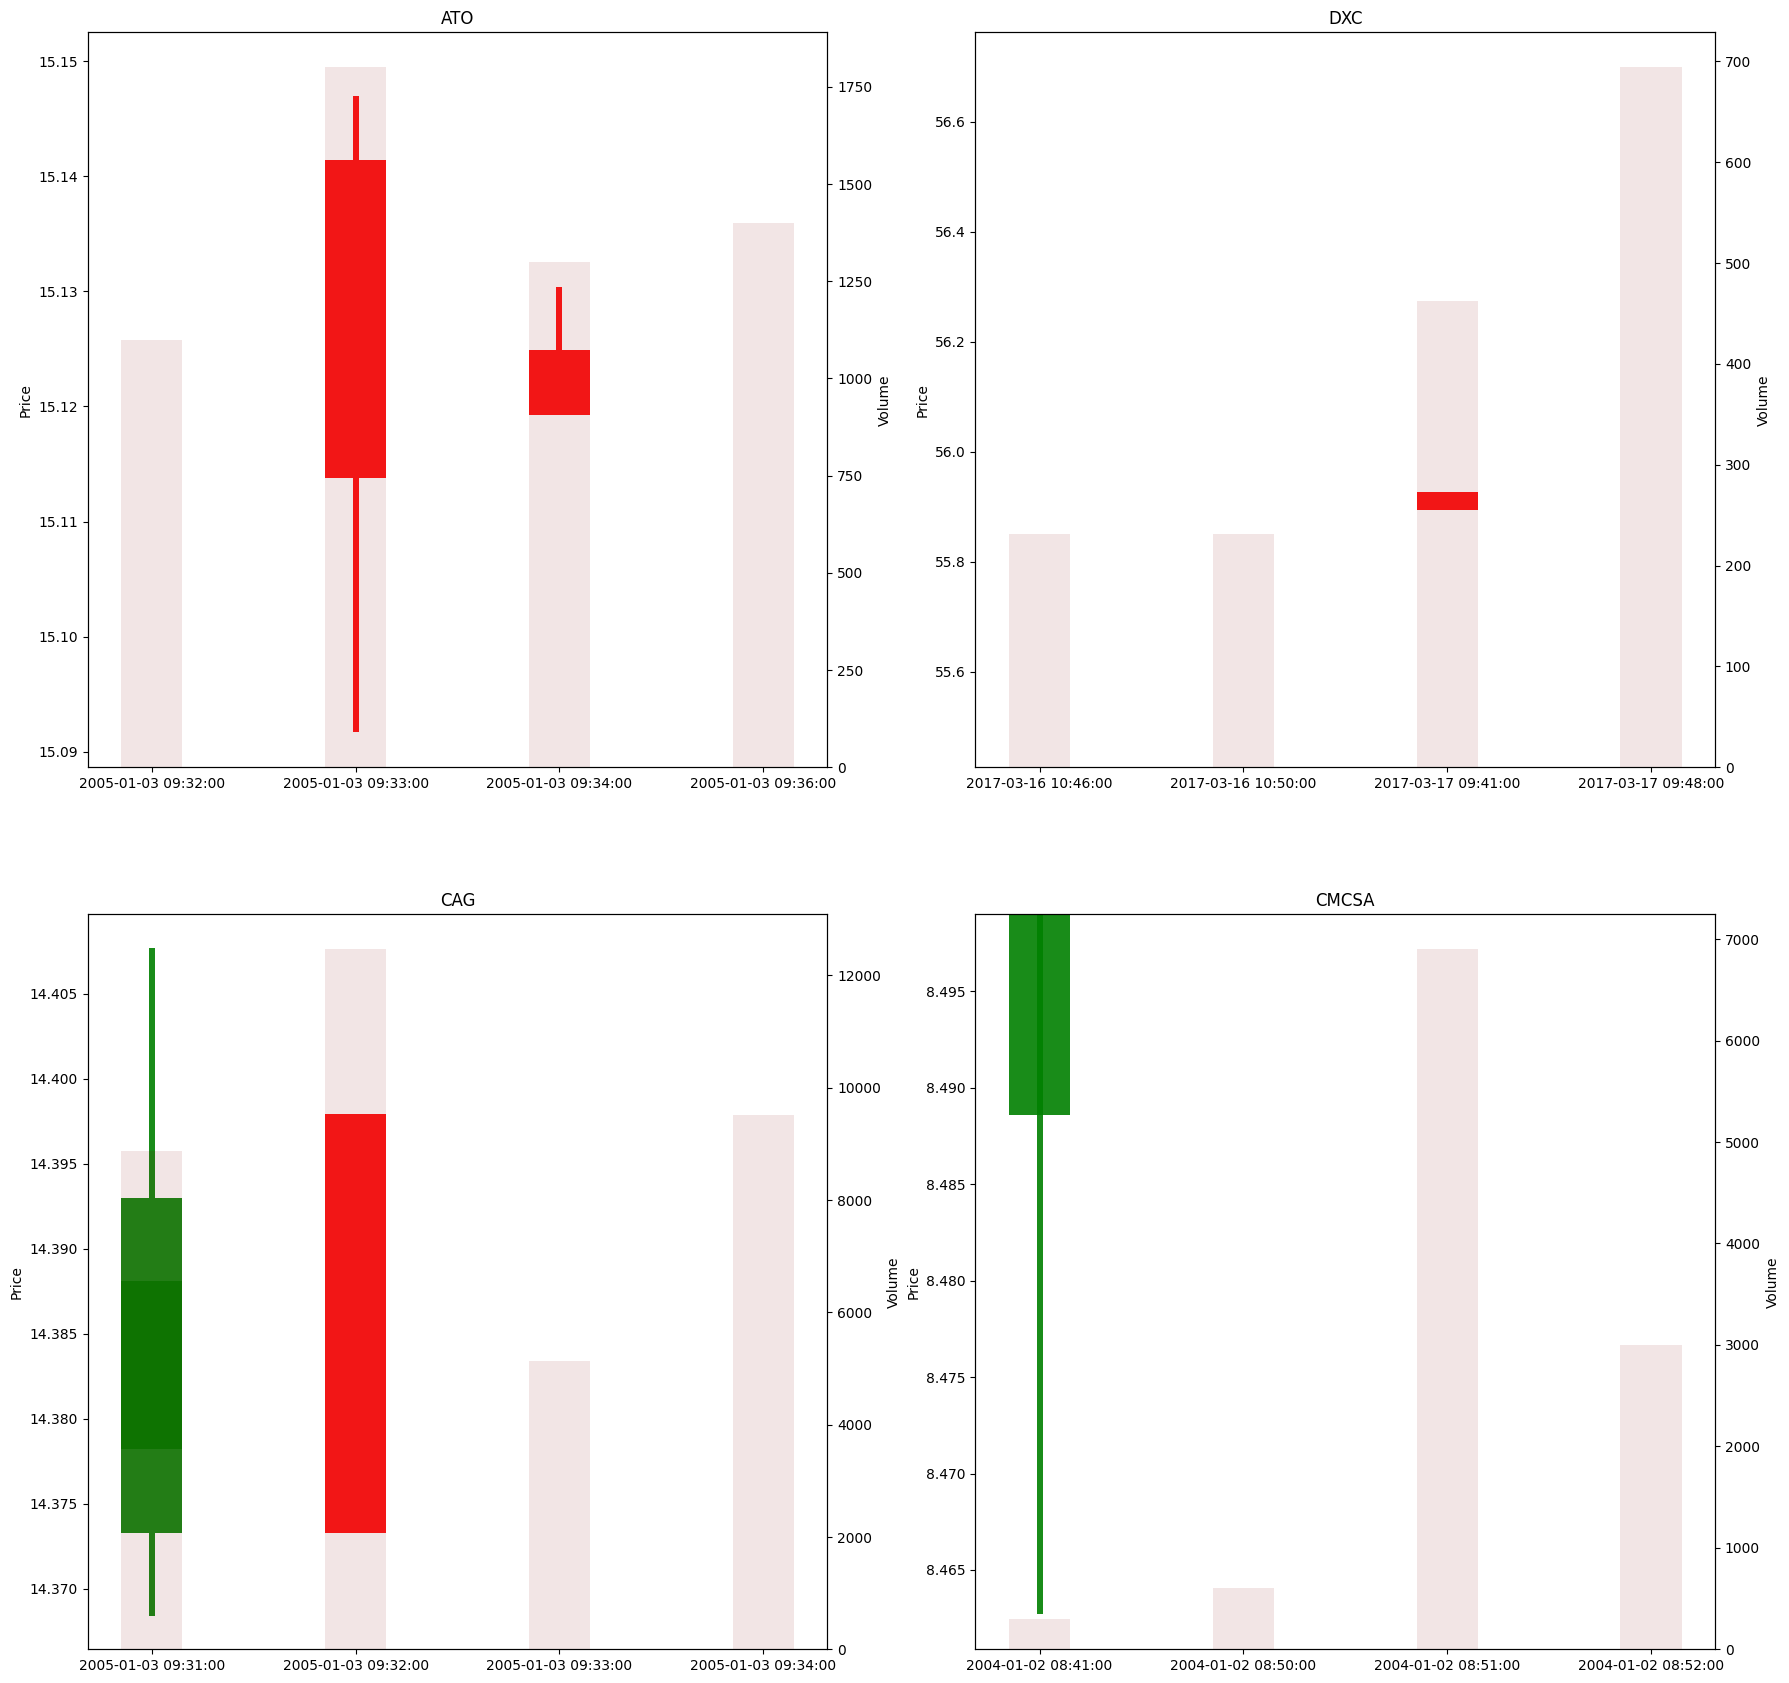

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 21))
k=0
for i in range(0,2):
    for j in range(0,2):
        up=df[k].iloc[1:5][df[k].iloc[1:5].Open<=df[k].iloc[1:5].Close] #defining up as the entries where Closing is greater than Opening
        down=df[k].iloc[1:5][df[k].iloc[1:5].Close<df[k].iloc[1:5].Open] #defining up as the entries where Closing is less than Opening
        c1='green'
        c2='red'
        w=0.03
        w1=0.3
        axes[i,j].bar(up.Time, up.Close-up.Open, w1, bottom=up.Open, color=c1,alpha=0.9)
        axes[i,j].bar(up.Time, up.Max-up.Close, w, bottom=up.Close, color=c1,alpha=0.9)
        axes[i,j].bar(up.Time, up.Min-up.Open,w, bottom=up.Open,color=c1,alpha=0.9)
        axes[i,j].bar(down.Time, down.Close-down.Open, w1, bottom=down.Open, color=c2,alpha=0.9)
        axes[i,j].bar(down.Time, down.Max-down.Open, w, bottom=down.Open, color=c2,alpha=0.9)
        axes[i,j].bar(down.Time, down.Min-down.Close,w, bottom=down.Close,color=c2,alpha=0.9)
        axes[i,j].set_title(stocks[k])
        # axes[i,j].set_xticklabels(down.Time,rotation=30, ha='right')
        axes[i,j].set_ylabel('Price')
        ax2 = axes[i,j].twinx()
        ax2.bar(df[k].iloc[1:5].Time, df[k].iloc[1:5].Vol, color ='maroon',width = 0.3,alpha=0.1)
        ax2.set_ylabel('Volume')
        k+=1
plt.show()


##1 (d) Note down your observations, e.g. are there any data issues, unexpected jumps,unexpected missing data etc

a) There are several **unexpected missing data:** the data is not continuous, i.e., there are missing data points for intermediate minutes between two data points for several times\
b) There are several **unexpected jumps:** Sometimes there are **huge spikes** on the Closing price at certain datapoints

#Q2) Normalization of Data

There are broadly two ways of normalization:\
 (i)  **Max-Min Normalization**\
 (ii) **Standard Scaler Normalization**

In [ ]:
file_path1='/content/drive/MyDrive/EE782_Assg_1/ATO_1min.txt'
file_path2='/content/drive/MyDrive/EE782_Assg_1/CAG_1min.txt'
file_path3='/content/drive/MyDrive/EE782_Assg_1/CMCSA_1min.txt'
file_path4='/content/drive/MyDrive/EE782_Assg_1/AWK_1min.txt'
df=[]
col_names=['Time', 'Open','Max', 'Min', 'Close', 'Vol']
stocks=['ATO','CAG','CMCSA','AWK']
df.append(pd.read_csv(file_path1,names=col_names))
df.append(pd.read_csv(file_path2,names=col_names))
df.append(pd.read_csv(file_path3,names=col_names))
df.append(pd.read_csv(file_path4,names=col_names))
for i in range(len(df)):
    df[i].iloc[:,0]=pd.to_datetime(df[i].iloc[:,0])

<ipython-input-155-17e68993d250>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df[i].iloc[:,0]=pd.to_datetime(df[i].iloc[:,0])
<ipython-input-155-17e68993d250>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df[i].iloc[:,0]=pd.to_datetime(df[i].iloc[:,0])
<ipython-input-155-17e68993d250>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `d

##Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler(feature_range=(-1, 1)) #Scaling features to (-1,1)
norm_1=copy.deepcopy(df) #Applying Deep Copy
for i in range(4):
    norm_1[i][['Open','Max', 'Min', 'Close','Vol']]=scaler.fit_transform(df[i][['Open','Max', 'Min', 'Close','Vol']])
print(norm_1[0])

                       Time      Open       Max       Min     Close       Vol
0       2005-01-03 09:31:00 -0.955588 -0.956845 -0.955584 -0.956093 -0.999708
1       2005-01-03 09:32:00 -0.955588 -0.956845 -0.955584 -0.956093 -0.999871
2       2005-01-03 09:33:00 -0.955588 -0.956736 -0.956554 -0.956631 -0.999789
3       2005-01-03 09:34:00 -0.955372 -0.956629 -0.955367 -0.955876 -0.999848
4       2005-01-03 09:36:00 -0.955910 -0.957060 -0.956016 -0.956524 -0.999836
...                     ...       ...       ...       ...       ...       ...
1406457 2022-02-25 16:03:00  0.878364  0.877938  0.878538  0.878159 -0.999356
1406458 2022-02-25 16:10:00  0.878364  0.877938  0.878538  0.878159 -1.000000
1406459 2022-02-25 16:30:00  0.878364  0.877938  0.878538  0.878159 -0.999980
1406460 2022-02-25 18:30:00  0.878364  0.877938  0.878538  0.878159 -1.000000
1406461 2022-02-25 19:00:00  0.878364  0.877938  0.878538  0.878159 -1.000000

[1406462 rows x 6 columns]


##Standard Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # Utilizing Standard Scaler
norm_2=copy.deepcopy(df) #Applying Deep Copy
for i in range(4):
    norm_2[i][['Open','Max', 'Min', 'Close','Vol']]=scaler.fit_transform(df[i][['Open','Max', 'Min', 'Close','Vol']]) #Standard Scaler
print(norm_2[0])

                       Time      Open       Max       Min     Close       Vol
0       2005-01-03 09:31:00 -1.023217 -1.023320 -1.023115 -1.023220  0.055886
1       2005-01-03 09:32:00 -1.023217 -1.023320 -1.023115 -1.023220 -0.021641
2       2005-01-03 09:33:00 -1.023217 -1.023143 -1.024683 -1.024091  0.017123
3       2005-01-03 09:34:00 -1.022866 -1.022970 -1.022765 -1.022869 -0.010566
4       2005-01-03 09:36:00 -1.023737 -1.023667 -1.023812 -1.023917 -0.005028
...                     ...       ...       ...       ...       ...       ...
1406457 2022-02-25 16:03:00  1.941178  1.940328  1.942048  1.941194  0.222294
1406458 2022-02-25 16:10:00  1.941178  1.940328  1.942048  1.941194 -0.082556
1406459 2022-02-25 16:30:00  1.941178  1.940328  1.942048  1.941194 -0.073142
1406460 2022-02-25 18:30:00  1.941178  1.940328  1.942048  1.941194 -0.082556
1406461 2022-02-25 19:00:00  1.941178  1.940328  1.942048  1.941194 -0.082556

[1406462 rows x 6 columns]


## Observing the Range of values obtained by both the methods Min-Max scaling seems more appropriate for stock analysis
Min-Max scaling preserves the **proportional connections** between data points, which proves valuable when dealing with stock data.This is because in  stock analysis **interdependencies among Open, High, Low, and Close** prices are significant and this attribute of Min-Max Scaler is highly advantageous

# Q3) Make some scenario decisions

##3 (a) Inter-Day Trade
I will prefer inter-day trade as the data is not continuous minute-wise but is day-wise continuous

##3 (b) Buy-Ask Spread and Commission

*   **Buy-Ask spread:** Buy ask spread ∝ (Price/Volume) I'll let the proportionality constant to be 1%
*   **Trade Commission:** By surfing over the internet, I found out that an average trade commission of 2$ is charged




##3 (c) Trading with Single Stock
I have decided to begin with trading only a single stock

#Q4) Write a pytorch module for defining an LSTM model. Keep it flexible so that the input dimension, number of units, number of layers can easily be changed

In [ ]:
dfm=copy.deepcopy(df) #deep Copy
df_n1=copy.deepcopy(df)

norm=[]
for i in range(4):
    dfm[i]['Month']=df[i]['Time'].apply(lambda x: str(x.month) + ' '+ str(x.year))
    dic={}

## Code For Averaging over MONTH


    dic['Open']=df[i].groupby(pd.Grouper(freq='M',key='Time')).first().iloc[:,0]
    dfm[i]['Max']=df[i][['Max','Time']].groupby(pd.Grouper(freq='M',key='Time'))['Max'].transform(lambda x: x.max())
    dfm[i]['Min']=df[i][['Min','Time']].groupby(pd.Grouper(freq='M',key='Time'))['Min'].transform(lambda x: x.min())
    dic['Close']=df[i].groupby(pd.Grouper(freq='M',key='Time')).last().iloc[:,-2]
    dfm[i]['Vol']=df[i][['Vol','Time']].groupby(pd.Grouper(freq='M',key='Time'))['Vol'].transform(lambda x: x.sum())
    dfm[i]=dfm[i].drop_duplicates(subset='Month')
    dic['Open'] = dic['Open'].dropna()
    dic['Close']=dic['Close'].dropna()
    dfm[i]['Open']=dic['Open'].to_numpy()
    dfm[i]['Close']=dic['Close'].to_numpy()


In [ ]:
#Setting up an LSTM Module
class LSTM(nn.Module):
    def __init__(self, inp, hidden, layers):
        super().__init__()
        self.hidden = hidden #defining no. of hidden Layers
        self.layers = layers #Defining no. of layers in an LSTM
        self.lstm = nn.LSTM(inp, hidden, layers,batch_first=True) #giving arguments as input to the LSTM
        self.fc = nn.Linear(hidden, 1) #Setting prediction to be of siongle dimension

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.layers, batch_size, self.hidden).to(device) #Initializing
        c0 = torch.zeros(self.layers, batch_size, self.hidden).to(device) #Initializing
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :]) #Taking the final time_step of the time sequence
        return out
model = LSTM(5,5, 1) #Giving the parameters to the LSTM model
model.to(device)
model

LSTM(
  (lstm): LSTM(5, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

#Q5) Write a flexible dataloader for training the LSTM model

In [ ]:
dfm=copy.deepcopy(df) #Deep Copy
df_n1=copy.deepcopy(df) #Deep Copy

norm=[] #Normalized array Day-wise
for i in range(4):
    dfm[i]['Day']=df[i]['Time'].apply(lambda x: str(x.day) +' '+str(x.month) + ' '+ str(x.year)) #Spliting via delimiters
    dic={}

## Code Averaging Over Days

##Applying function Day-Wise
    dic['Open']=df[i].groupby(pd.Grouper(freq='D',key='Time')).first().iloc[:,0]
    dfm[i]['Max']=df[i][['Max','Time']].groupby(pd.Grouper(freq='D',key='Time'))['Max'].transform(lambda x: x.max())
    dfm[i]['Min']=df[i][['Min','Time']].groupby(pd.Grouper(freq='D',key='Time'))['Min'].transform(lambda x: x.min())
    dic['Close']=df[i].groupby(pd.Grouper(freq='D',key='Time')).last().iloc[:,-2]
    dfm[i]['Vol']=df[i][['Vol','Time']].groupby(pd.Grouper(freq='D',key='Time'))['Vol'].transform(lambda x: x.sum())
    dfm[i]=dfm[i].drop_duplicates(subset='Day')
    dic['Open'] = dic['Open'].dropna() #droping Nan Values
    dic['Close']=dic['Close'].dropna() #Droping Nan values
    dfm[i]['Open']=dic['Open'].to_numpy()
    dfm[i]['Close']=dic['Close'].to_numpy()


In [ ]:
## Averaging Over Days and using MIN-MAX Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1, 1))
norm=copy.deepcopy(dfm)
for i in range(4):
    norm[i][['Open','Max', 'Min', 'Close','Vol']]=scaler.fit_transform(norm[i][['Open','Max', 'Min', 'Close','Vol']])
    norm[i].drop(columns=['Day'],inplace=True) #Droping Day column as not required for training or Testeing
    norm[i]=norm[i].reset_index() #Reseting Indices
    norm[i].drop(columns=['index'],inplace=True)

In [ ]:
X=[]
Y=[]
past=15
#setting the see_back_timesteps as 15
for i in range(past-1,len(norm[1])-1):
    y=[]
    for j in range(past,0,-1):
        y.append(np.array(norm[1].iloc[i-j,1:6]))
    X.append(np.array(y))
    Y.append(np.array(norm[1].iloc[i,4]))
X=np.array(X)

print(X.shape)

(4303, 15, 5)


In [ ]:
##Segregating Training and Testing Data
X_Train=X[:int(0.8*X.shape[0])]
X_Test=X[int(0.8*X.shape[0]):]
Y_Train=Y[:int(0.8*X.shape[0])]
Y_Test=Y[int(0.8*X.shape[0]):]


##Changing Array Type to Float
X_Test=np.array(X_Test).reshape(-1,past,5).astype('float')
X_Train=np.array(X_Train).reshape(-1,past,5).astype('float')
Y_Test=np.array(Y_Test).reshape(-1,1).astype('float')
Y_Train=np.array(Y_Train).reshape(-1,1).astype('float')

In [ ]:
##Conversion of Data Type
X_Train = torch.tensor(X_Train).float()
Y_Train = torch.tensor(Y_Train).float()
X_Test = torch.tensor(X_Test).float()
Y_Test = torch.tensor(Y_Test).float()

In [ ]:
print(X_Train.shape)

torch.Size([3442, 15, 5])


In [ ]:
from torch.utils.data import Dataset
#Initializing the Dataset of the Timeseries
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
#Defing testing and Training datasets
train_dataset = TimeSeriesDataset(X_Train, Y_Train)
test_dataset = TimeSeriesDataset(X_Test, Y_Test)

In [ ]:
from torch.utils.data import DataLoader
##Seting batch size and feeding in to the DataLoader
batch_size =32
##Dataloader gives us the dat batch-wise segregated
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    ##Dataloader gives us the dat batch-wise segregated
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 15, 5]) torch.Size([32, 1])


#Q6) Training the model by trying to predict the future Closing Price

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
#setting up training of an epoch
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()#Calc aggregate Loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
 #setting up validating for an epoch
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item() #Calc aggregate Loss

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs =15
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in tqdm(range(num_epochs)):
    train_one_epoch()
    validate_one_epoch()

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1

Val Loss: 0.001
***************************************************

Epoch: 2

Val Loss: 0.001
***************************************************

Epoch: 3

Val Loss: 0.001
***************************************************

Epoch: 4

Val Loss: 0.001
***************************************************

Epoch: 5

Val Loss: 0.001
***************************************************

Epoch: 6

Val Loss: 0.001
***************************************************

Epoch: 7

Val Loss: 0.001
***************************************************

Epoch: 8

Val Loss: 0.001
***************************************************

Epoch: 9

Val Loss: 0.001
***************************************************

Epoch: 10

Val Loss: 0.001
***************************************************

Epoch: 11

Val Loss: 0.001
***************************************************

Epoch: 12

Val Loss: 0.001
***************************************************

Epoch: 13

Val Loss: 0.001
**********************

#Q7) Trading module that will make some hard-coded logical decisions to buy, hold, sell

## We can trade Profitably!!

In [ ]:
model.eval()
comm=0.001
def predictor(x,model,comm=0,thr=0):
     #shape of x is (1,past=15,5)
    y=0
    out=model(x)
    if out>(x[0,-1,-2]+comm+thr): #Condition for Buying
        y='Buy'
    elif out<(x[0,-1,-2]+comm-thr): #Condition for Selling
        y='Sell'
    else:
        y='Hold' #Else Hold
    return(y)
profit=0 #Initialization

##Iterating for the Test Data Set to determine Profit

for i in DataLoader(TimeSeriesDataset(X_Test, Y_Test), batch_size=1, shuffle=False):
    batch=i[0]
    out=i[1].reshape(-1)
    mod=model(i[0]).detach().reshape(-1)
    if(predictor(batch,model,thr=0.005,comm=0.001)=='Buy'):
        profit+=out-batch[0,-1,-2]-comm
    elif(predictor(batch,model,thr=0.005,comm=0.001)=='Sell'):
        profit+=(-out+batch[0,-1,-2])-comm

print(profit)

tensor([0.7730])


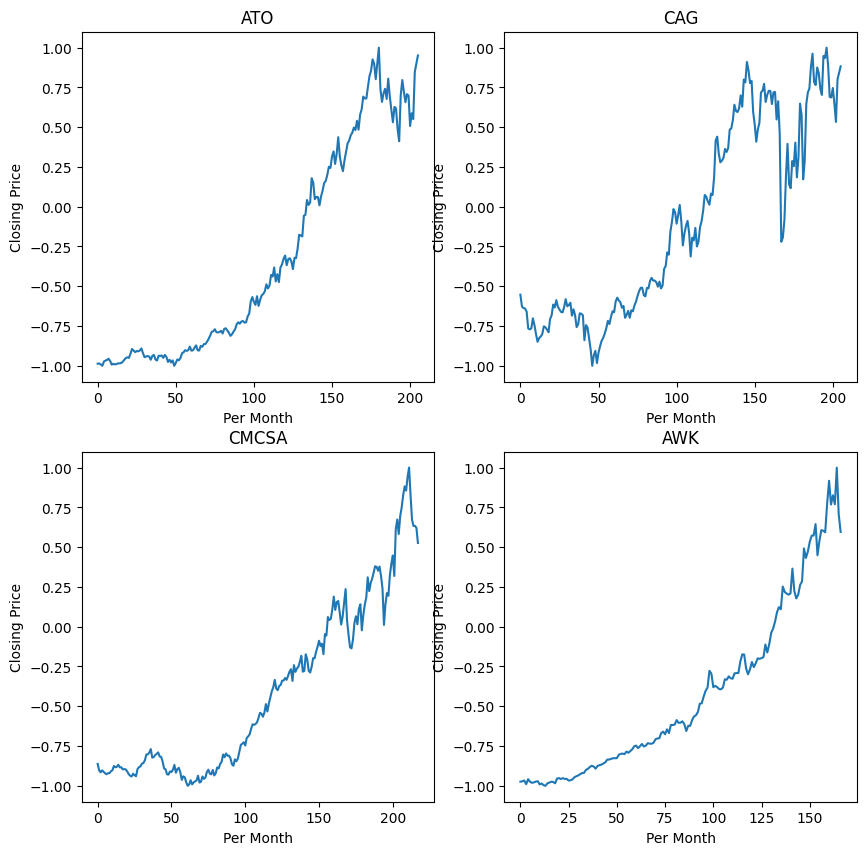

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
k=0
for i in range(0,2):
    for j in range(0,2):
        lst=norm[k].Close
        axes[i,j].plot(np.arange(len(norm[k])),lst)
        axes[i,j].set_xlabel('Per Month')
        axes[i,j].set_ylabel('Closing Price')
        axes[i,j].set_title(stocks[k])
        k+=1
plt.show()

#Q8)  Testing the Trading system on the latest years

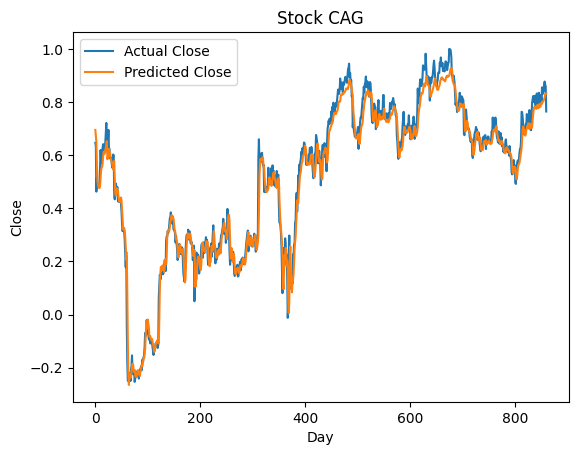

In [ ]:
with torch.no_grad():
    predicted = model(X_Test.to(device)).to('cpu').numpy()
plt.plot(Y_Test, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.title('Stock CAG')
plt.show()

##8 (a) Prediction Error Increases
Clearly as we expected the price **prediction error increases** as you go further in time from the last time on which it was trained.

##8 (b) We Can Trade Profitably!!

In [ ]:
for i in DataLoader(TimeSeriesDataset(X_Test, Y_Test), batch_size=1, shuffle=False):
    batch=i[0]
    out=i[1].reshape(-1)
    mod=model(i[0]).detach().reshape(-1)
    if(predictor(batch,model,thr=0.005,comm=0.001)=='Buy'):
        profit+=out-batch[0,-1,-2]-comm
    elif(predictor(batch,model,thr=0.005,comm=0.001)=='Sell'):
        profit+=(-out+batch[0,-1,-2])-comm

print(profit)

tensor([1.5461])


Even by taking Considerable Commission into account, i.e., **1% of max stock value**. We can trade profitably!  
**Note:** Thevalue obtained is the normalized value

## 8 (c) The strategy used above produces significant profit by utilizing buy, hold and share and thus outperforms a simple buy-and-hold strategy over a large period of time

#Q9) ADVANCED [BONUS]

##9 (a)Model using multiple stock prices as inputs

In [ ]:
new=norm[3].loc[norm[3]['Time'].dt.year !=2004] #Using other stocks and using the datapoints corresponding to same days

In [ ]:
model = LSTM(10,10, 1)
model.to(device)

LSTM(
  (lstm): LSTM(10, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model = LSTM(10,12, 1) #LSTM having 10 inputs and hidden layers as 12
model.to(device)
X1=[]
Y1=[]
past=15
for i in range(past-1,len(norm[2])-1):
    y=[]
    for j in range(past,0,-1):
        y.append(np.concatenate((np.array(new.iloc[i-j,1:6]),np.array(norm[2].iloc[i-j,1:6])))) #Concatenating with Otehr Stocks
    X1.append(np.array(y))
    Y1.append(np.array(norm[2].iloc[i,4]))
X1=np.array(X1)

print(X1.shape)

(4303, 15, 10)


In [ ]:
X_Train1=X1[:int(0.8*X1.shape[0])]
X_Test1=X1[int(0.8*X1.shape[0]):]
Y_Train1=Y1[:int(0.8*X1.shape[0])]
Y_Test1=Y1[int(0.8*X1.shape[0]):]

X_Test1=np.array(X_Test1).reshape(-1,past,10).astype('float')
X_Train1=np.array(X_Train1).reshape(-1,past,10).astype('float')
Y_Test1=np.array(Y_Test1).reshape(-1,1).astype('float')
Y_Train1=np.array(Y_Train1).reshape(-1,1).astype('float')
##Segregating Training and Testing Data

##Conversion of Data Type
X_Train1 = torch.tensor(X_Train1).float()
Y_Train1 = torch.tensor(Y_Train1).float()
X_Test1 = torch.tensor(X_Test1).float()
Y_Test1 = torch.tensor(Y_Test1).float()

In [ ]:
batch_size1 =32
##Seting batch size and feeding in to the DataLoader
train_dataset = TimeSeriesDataset(X_Train1, Y_Train1)
test_dataset = TimeSeriesDataset(X_Test1, Y_Test1)

##Dataloader gives us the dat batch-wise segregated
train_loader = DataLoader(train_dataset, batch_size=batch_size1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size1, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 15, 10]) torch.Size([32, 1])


In [ ]:
learning_rate = 0.001
num_epochs =20 #num epochs=20
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.001

Val Loss: 0.004
***************************************************

Epoch: 2
Batch 100, Loss: 0.000

Val Loss: 0.006
***************************************************

Epoch: 3
Batch 100, Loss: 0.000

Val Loss: 0.006
***************************************************

Epoch: 4
Batch 100, Loss: 0.000

Val Loss: 0.006
***************************************************

Epoch: 5
Batch 100, Loss: 0.000

Val Loss: 0.005
***************************************************

Epoch: 6
Batch 100, Loss: 0.000

Val Loss: 0.006
***************************************************

Epoch: 7
Batch 100, Loss: 0.000

Val Loss: 0.004
***************************************************

Epoch: 8
Batch 100, Loss: 0.000

Val Loss: 0.005
***************************************************

Epoch: 9
Batch 100, Loss: 0.000

Val Loss: 0.004
***************************************************

Epoch: 10
Batch 100, Loss: 0.000

Val Loss: 0.005
********************************

###Evaluation and Conclusion
For the initial datapoints it is predicting quite well, but as the horizon of evaluation increases the prediction error increases when compared to the model traioned with only a single stock

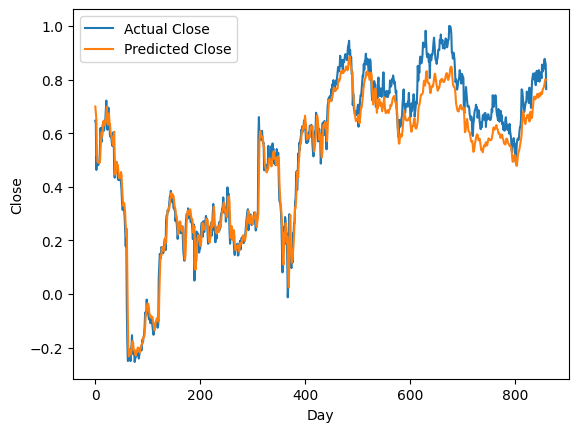

In [ ]:
with torch.no_grad():
    predicted = model(X_Test1.to(device)).to('cpu').numpy()
plt.plot(Y_Test1, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

##9 (b) Adding Day Of the Week and Along With Utiling Multiple Stocks to Improve Prediction

In [ ]:
norm[2]['Day'] = norm[2]['Time'].dt.day_name() #Getting the name of the days for a date
one_hot_bit = pd.get_dummies(norm[2]['Day']) #generating one-hot for each day
norm[2] = pd.concat([norm[2], one_hot_bit], axis=1) #concatenating the one-hot bit array
norm[2]= norm[2].drop(columns=['Day'])
print(norm[2])

                    Time      Open       Max       Min     Close       Vol  \
0    2005-01-03 09:30:00 -0.554050 -0.551088 -0.544902 -0.547182 -0.909536   
1    2005-01-04 09:30:00 -0.549845 -0.553681 -0.548476 -0.557214 -0.877250   
2    2005-01-05 09:30:00 -0.557601 -0.562419 -0.555933 -0.566599 -0.865044   
3    2005-01-06 09:30:00 -0.566648 -0.566299 -0.557561 -0.559484 -0.950536   
4    2005-01-07 09:30:00 -0.562128 -0.566945 -0.557237 -0.564012 -0.950544   
...                  ...       ...       ...       ...       ...       ...   
4313 2022-02-18 08:00:00  0.870980  0.880195  0.871232  0.877286 -0.818560   
4314 2022-02-22 07:37:00  0.874933  0.880195  0.851711  0.865407 -0.877186   
4315 2022-02-23 07:25:00  0.865708  0.868976  0.857997  0.858807 -0.860231   
4316 2022-02-24 09:26:00  0.845940  0.847859  0.736568  0.764427 -0.818862   
4317 2022-02-25 09:29:00  0.768844  0.837961  0.786530  0.833067 -0.834676   

      Friday  Monday  Thursday  Tuesday  Wednesday  
0         

In [ ]:
new['Day'] = new['Time'].dt.day_name() #Getting the name of the days for a date for other Stocks
one_hot_bit = pd.get_dummies(new['Day']) #generating one-hot for each day
new = pd.concat([new, one_hot_bit], axis=1) #Concat One-hot bit Encoding
new= new.drop(columns=['Day'])
print(new)

                    Time      Open       Max       Min     Close       Vol  \
252  2005-01-03 08:59:00 -0.854852 -0.859392 -0.721971 -0.854886 -0.826737   
253  2005-01-04 09:17:00 -0.857947 -0.863049 -0.727427 -0.862513 -0.811136   
254  2005-01-05 09:16:00 -0.866419 -0.866158 -0.728876 -0.860078 -0.791514   
255  2005-01-06 09:25:00 -0.864053 -0.865335 -0.726320 -0.858631 -0.866808   
256  2005-01-07 09:28:00 -0.863595 -0.866613 -0.725296 -0.858440 -0.869944   
...                  ...       ...       ...       ...       ...       ...   
4565 2022-02-18 08:00:00  0.491767  0.505945  0.528589  0.480525 -0.880097   
4566 2022-02-22 06:34:00  0.482260  0.516544  0.534518  0.507652 -0.880440   
4567 2022-02-23 06:33:00  0.493527  0.495346  0.475879  0.437193 -0.767207   
4568 2022-02-24 05:17:00  0.422403  0.462136  0.454136  0.457626 -0.818209   
4569 2022-02-25 08:00:00  0.441416  0.511421  0.496304  0.506951 -0.844315   

      Friday  Monday  Thursday  Tuesday  Wednesday  
252       

<ipython-input-128-f592dc9fa78e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Day'] = new['Time'].dt.day_name()


In [ ]:
model = LSTM(20,20, 1) #Training model with 20 hidden layers
model.to(device)
X1=[]
Y1=[]
past=15
for i in range(past-1,len(norm[2])-1):
    y=[]
    for j in range(past,0,-1):
        y.append(np.concatenate((np.array(new.iloc[i-j,1:]),np.array(norm[2].iloc[i-j,1:]))))
    X1.append(np.array(y))
    Y1.append(np.array(norm[2].iloc[i,4]))
X1=np.array(X1)

print(X1.shape)

(4303, 15, 20)


In [ ]:
X_Train1=X1[:int(0.8*X1.shape[0])]
X_Test1=X1[int(0.8*X1.shape[0]):]
Y_Train1=Y1[:int(0.8*X1.shape[0])]
Y_Test1=Y1[int(0.8*X1.shape[0]):]

X_Test1=np.array(X_Test1).reshape(-1,past,20).astype('float')
X_Train1=np.array(X_Train1).reshape(-1,past,20).astype('float')
Y_Test1=np.array(Y_Test1).reshape(-1,1).astype('float')
Y_Train1=np.array(Y_Train1).reshape(-1,1).astype('float')

X_Train1 = torch.tensor(X_Train1).float()
Y_Train1 = torch.tensor(Y_Train1).float()
X_Test1 = torch.tensor(X_Test1).float()
Y_Test1 = torch.tensor(Y_Test1).float()

In [ ]:
batch_size1 =32

train_dataset = TimeSeriesDataset(X_Train1, Y_Train1)
test_dataset = TimeSeriesDataset(X_Test1, Y_Test1)
train_loader = DataLoader(train_dataset, batch_size=batch_size1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size1, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 15, 20]) torch.Size([32, 1])


In [ ]:
learning_rate = 0.001
num_epochs =10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.001

Val Loss: 0.003
***************************************************

Epoch: 2
Batch 100, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 3
Batch 100, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 4
Batch 100, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 5
Batch 100, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 6
Batch 100, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 7
Batch 100, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 8
Batch 100, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 9
Batch 100, Loss: 0.000

Val Loss: 0.002
***************************************************

Epoch: 10
Batch 100, Loss: 0.000

Val Loss: 0.003
********************************

###Evaluation and Conclusion (Drastically Improves!)

Our Model's Performance drastically increases as we use the information about days of the week. It performs much better than both the previous models!

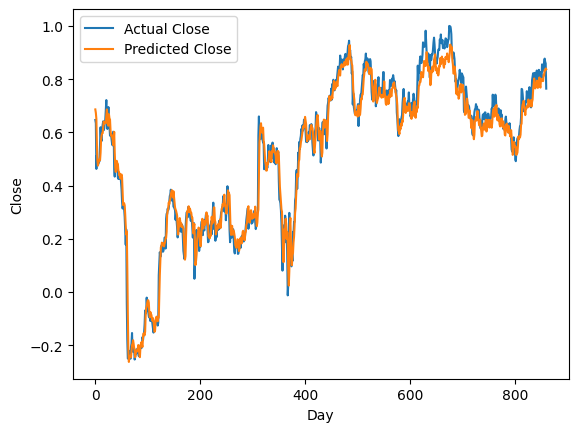

In [ ]:
with torch.no_grad():
    predicted = model(X_Test1.to(device)).to('cpu').numpy()
plt.plot(Y_Test1, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.title('')
plt.show()

#References

Amazon Stock Analysis: https://www.youtube.com/watch?v=q_HS4s1L8UI&t=652s
(https://colab.research.google.com/drive/1CBIdPxHn_W2ARx4VozRLIptBrXk7ZBoM?usp=sharing)
